# Relax Inc. Take-Home Challenge

### Load Data

In [1]:
# Load libraries

import pandas as pd
import numpy as np

In [2]:
# Load data

df1 = pd.read_csv(r'C:\Users\bronc\Downloads\1481069814_relax_challenge\relax_challenge\takehome_users.csv', encoding='latin-1')
df2 = pd.read_csv(r'C:\Users\bronc\Downloads\1481069814_relax_challenge\relax_challenge\takehome_user_engagement.csv', encoding='latin-1')                  

In [3]:
# Verify data loaded successfully

df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


### Determine Adopted Users

An adopted user is defined as any user who logged in 3 times during any 7 day period. For this we need to use the data in df2 to figure out whether a given user has adopted or not

In [5]:
# View data info

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
# Convert time_stamp to datetime

df2['time_stamp'] = pd.to_datetime(df2['time_stamp'], errors = 'coerce')

In [7]:
# Verify change

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
# Define a function for adopted users

def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    # First drop duplicate days and sort by date
    
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    
    # Calculate how many days has passed for every 3 logins
    
    passed_days = df['date'].diff(periods=logins-1)
    
    # Check if any passed time is less than 7 days
    
    return any(passed_days <= timedelta(days=days))

In [9]:
# Apply function

df_a = df2.groupby('user_id').apply(logins_in_days)

In [10]:
# View number of adopted users

print('There were {} adopted users out of {} users'.format(
    sum(df_a), len(df_a)))

There were 1656 adopted users out of 8823 users


In [11]:
# Check data

df_a.head()

user_id
1    False
2     True
3    False
4    False
5    False
dtype: bool

### Clean User Dataset

In [12]:
# View data

df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


Name, email, org_id and which user_id someone was invited by don't tell us anything pertaining to why someone becomes an adopted user so they can be removed

In [13]:
# Drop columns

df1.drop(columns=['name', 'email', 'org_id', 'invited_by_user_id'], inplace = True)

In [14]:
# Verify drop

df1.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0


Creation_time and last_session_creation_time are both valid columns but I feel like they would be optimized by recalculating them into 2 new columns. One would be the length of time that someone has been actively using the software while the other would be how long they have had an account. These 2 columns will likely be correlated but will vary based on whether someone used from day 1 or waited to start using

In [15]:
# Create column active_time
# Convert both starting columns to datetime

df1['creation_time'] = pd.to_datetime(
    df1['creation_time'], format='%Y-%m-%d %H:%M:%S')
df1['last_session_creation_time'] = pd.to_datetime(
    df1['last_session_creation_time'], unit='s')

# Calculate active_time, defined as number of days between account creation and last use

df1['active_time'] = df1['last_session_creation_time'] - df1['creation_time']
df1['active_time'] = df1['active_time'].dt.days

In [16]:
# Calculate account_age, defined as number of days since account creation
# Since I'm not sure when this dataset was collected. I'll use the latest date in creation_time

latest = max(df1['creation_time'])
df1['account_age'] = latest - df1['creation_time']
df1['account_age'] = df1['account_age'].dt.days

# Drop the two original columns

df1.drop(columns=['creation_time', 'last_session_creation_time'], inplace = True)

In [17]:
# Verify changes

df1.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active_time,account_age
0,1,GUEST_INVITE,1,0,0.0,38
1,2,ORG_INVITE,0,0,136.0,196
2,3,ORG_INVITE,0,0,0.0,437
3,4,GUEST_INVITE,0,0,1.0,374
4,5,GUEST_INVITE,0,0,5.0,498


In [18]:
# Check info

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   active_time                 8823 non-null   float64
 5   account_age                 12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 562.6+ KB


Looks like there were about 3200 users who have null values for active_time data. This likely means that last_session_creation_time was null. In order to have an efficient model I will delete the null values from the data with the adopted data join as it also has 8823 user ids

In [19]:
# Join df1 and df_a

df1 = df1.set_index('object_id')
df1.index.name = 'user_id'
df = pd.concat([df1, df_a], axis=1, join='inner')

In [20]:
# Verify successful join

df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,active_time,account_age,0
user_id,,,,,,
1,GUEST_INVITE,1,0,0.0,38,False
2,ORG_INVITE,0,0,136.0,196,True
3,ORG_INVITE,0,0,0.0,437,False
4,GUEST_INVITE,0,0,1.0,374,False
5,GUEST_INVITE,0,0,5.0,498,False


In [21]:
# Rename adopted column

df.rename(columns={0: 'adopted'}, inplace=True)

In [22]:
# Set adopted column to int to make it easier to visualize and model

df['adopted'] = df['adopted'].astype(int)

### EDA

In [23]:
# Load libraries

import matplotlib.pyplot as plt
import seaborn as sns

First let's look at creation source and adopted to see if there's an obvious correlation

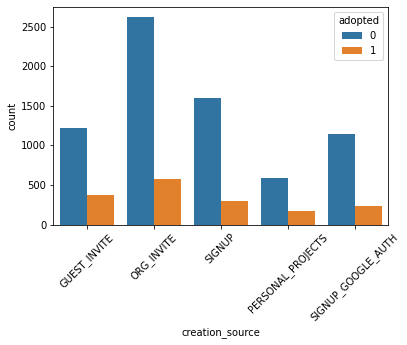

In [24]:
_ = sns.countplot(x='creation_source', data=df, hue='adopted')
_ = plt.xticks(rotation=45)

Doesn't look like there's an obvious difference between creation sources. Next let's look at active_time

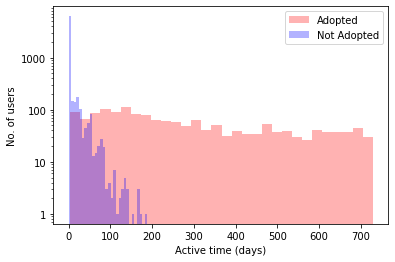

In [25]:
_ = plt.hist(df.loc[df['adopted']==1, 'active_time'], 
        bins=30, alpha=0.3, color='r', label='Adopted')
_ = plt.hist(df.loc[df['adopted']==0, 'active_time'], 
        bins=30, alpha=0.3, color='b', label='Not Adopted')
_ = plt.yscale('log')
_ = plt.legend()
_ = plt.xlabel('Active time (days)')
_ = plt.ylabel('No. of users')
_ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])

Looks like the longer you're active the more likely you are to adopt. This makes sense. Next I'll look at account_age

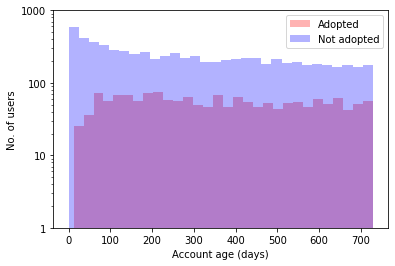

In [26]:
_ = plt.hist(df.loc[df['adopted']==1, 'account_age'], 
        bins=30, alpha=0.3, color='r', label='Adopted')
_ = plt.hist(df.loc[df['adopted']==0, 'account_age'], 
        bins=30, alpha=0.3, color='b', label='Not adopted')
_ = plt.yscale('log')
_ = plt.legend()
_ = plt.xlabel('Account age (days)')
_ = plt.ylabel('No. of users')
_ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])

Adoption rate is very low at first but it plateaus very quickly and doesn't seem to change in a notable way after that

Next I'll use a heatmap to see if there are any high correlations with adopted

<AxesSubplot:>

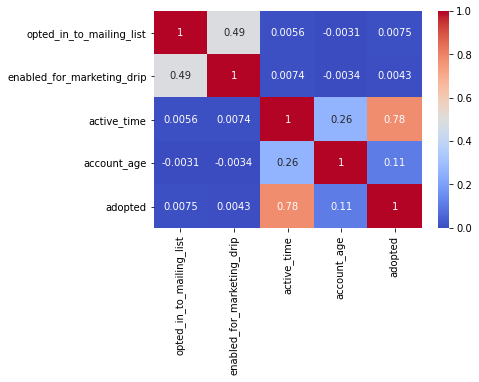

In [27]:
# Check for correlations on a heatmap

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

Looks like active_time is by far the most correlated followed by account_age. This doesn't tell us about individual creation sources though so a model is necessary to see if any of those stand out

### Modeling

In [28]:
# First I'll create dummy variables for creation_source

dummy_cs = pd.get_dummies(df['creation_source'], drop_first = True)

In [29]:
# Verify dummy date

dummy_cs.head()

,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
user_id,,,,
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,0
5,0,0,0,0


In [30]:
# With that made and verified to have worked I'll put it into my main df and drop creation_source

df = pd.concat([df, dummy_cs], axis = 1)
df.drop(columns=['creation_source'], inplace = True)
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,active_time,account_age,adopted,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,,
1,1,0,0.0,38,0,0,0,0,0
2,0,0,136.0,196,1,1,0,0,0
3,0,0,0.0,437,0,1,0,0,0
4,0,0,1.0,374,0,0,0,0,0
5,0,0,5.0,498,0,0,0,0,0


In [31]:
# Set up model variables

y = df['adopted']
X = df.drop('adopted', axis=1)

In [32]:
# Conduct train test split for modeling

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [33]:
# Use random forest model with balanced class weights to correct for imbalance in the data

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=123, class_weight='balanced')
# use CV to tune number of trees

params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(X_train, y_train)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 100}
Best average precision was 0.9619492158327109


In [34]:
# Evaluate model
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(
    random_state=123, class_weight='balanced', n_estimators=100
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of test set was', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of test set was 0.9539100868908198
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2151
           1       0.90      0.85      0.87       496

    accuracy                           0.95      2647
   macro avg       0.93      0.91      0.92      2647
weighted avg       0.95      0.95      0.95      2647



In [35]:
# Analyze feature importance
f_imp = pd.Series(model.feature_importances_, index=X.columns)
f_imp = f_imp.sort_values(ascending=False)
print(f_imp)

active_time                   0.892398
account_age                   0.090527
opted_in_to_mailing_list      0.003456
SIGNUP                        0.003437
enabled_for_marketing_drip    0.003082
ORG_INVITE                    0.003016
SIGNUP_GOOGLE_AUTH            0.002174
PERSONAL_PROJECTS             0.001910
dtype: float64


As expected from the heatmap, active_time was the most important feature by a significant margin. A way to increase adopted users would likely be to encourage users to log in more after they've had accounts for a while. This will also help because those who's accounts are older, as indicated by account_age, tend to adopt more as well. All other variables combine for less than 2% of the feature importance and therefore don't seem to be very significant. 